In [343]:


from IDT_.idt_algo import IDT
from IDT_.ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 



In [344]:
testperson = 19

In [345]:
warnings.filterwarnings('ignore') 
gaze = pd.read_csv("../eye_tracking_expiriment\data\gaze_data_Tülin_19.csv")
gaze.head(10)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.280619,1,1,-39.075691,47.457809,784.343567,20.979650,53.345211,785.401917,0.568899,...,2.669662,2.719177,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Immersive
1,0.291596,1,1,-38.901928,47.424465,784.120117,21.103529,53.280933,785.198853,0.568605,...,2.671158,2.712341,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Immersive
2,0.302586,1,1,-38.770611,47.388977,784.036133,21.242203,53.221767,785.102051,0.568375,...,2.660431,2.713760,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Immersive
3,0.313444,1,1,-38.545307,47.334721,783.865906,21.457098,53.124031,784.920166,0.567982,...,2.649445,2.715836,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Immersive
4,0.324933,1,1,-38.354813,47.295464,783.597351,21.627851,53.057663,784.631470,0.567661,...,2.627747,2.706192,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Immersive
5,0.336014,1,1,-38.208202,47.269466,783.436218,21.777987,52.993050,784.424255,0.567410,...,2.618896,2.696198,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Immersive
6,0.346750,1,1,-38.013607,47.234493,782.950195,21.910313,52.922398,783.993347,0.567100,...,2.609924,2.678268,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Immersive
7,0.358363,1,1,-37.910046,47.230995,782.895630,22.012703,52.889114,783.927185,0.566918,...,2.627304,2.670929,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Immersive
8,0.369360,1,1,-37.826412,47.227165,782.787292,22.108870,52.863876,783.783569,0.566775,...,2.631607,2.653488,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Immersive
9,0.380095,1,1,-37.680599,47.232544,782.921875,22.242109,52.840210,783.893677,0.566499,...,2.622742,2.653854,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Immersive


In [346]:
gaze = gaze.dropna()
gaze.reset_index(drop=True, inplace=True)
gaze.shape

(199649, 39)

In [347]:
un = gaze["text_file"].unique()
un

array(['AI_HC_P09_text.txt', 'AI_HC_P09_MCQ.txt', 'AI_HC_P09_FIBQ.txt',
       'OR_HC_P09_text.txt', 'OR_HC_P09_MCQ.txt', 'OR_HC_P09_FIBQ.txt',
       'AI_SK_P09_text.txt', 'AI_SK_P09_MCQ.txt', 'AI_SK_P09_FIBQ.txt',
       'OR_SK_P09_text.txt', 'OR_SK_P09_MCQ.txt', 'OR_SK_P09_FIBQ.txt',
       'AI_KB_P09_text.txt', 'AI_KB_P09_MCQ.txt', 'AI_KB_P09_FIBQ.txt',
       'OR_KB_P09_text.txt', 'OR_KB_P09_MCQ.txt', 'OR_KB_P09_FIBQ.txt'],
      dtype=object)

In [348]:
im_HC_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[0])]
im_HC_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[3])]
im_SK_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[6])]
im_SK_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[9])]
im_KB_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[12])]
im_KB_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[15])]
im_HC_AI.reset_index(drop=True, inplace=True) 
im_HC_OR.reset_index(drop=True, inplace=True) 
im_SK_AI.reset_index(drop=True, inplace=True) 
im_SK_OR.reset_index(drop=True, inplace=True) 
im_KB_AI.reset_index(drop=True, inplace=True) 
im_KB_OR.reset_index(drop=True, inplace=True) 

im_HC_AI["device_time_stamp"] = im_HC_AI["device_time_stamp"] - im_HC_AI["device_time_stamp"][0]
im_HC_OR["device_time_stamp"] = im_HC_OR["device_time_stamp"] - im_HC_OR["device_time_stamp"][0]
im_SK_AI["device_time_stamp"] = im_SK_AI["device_time_stamp"] - im_SK_AI["device_time_stamp"][0]
im_SK_OR["device_time_stamp"] = im_SK_OR["device_time_stamp"] - im_SK_OR["device_time_stamp"][0]
im_KB_AI["device_time_stamp"] = im_KB_AI["device_time_stamp"] - im_KB_AI["device_time_stamp"][0]
im_KB_OR["device_time_stamp"] = im_KB_OR["device_time_stamp"] - im_KB_OR["device_time_stamp"][0]
im_SK_OR.head(5)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.000000,1,1,-7.772744,42.498951,789.866455,53.033260,42.622864,788.095886,0.512170,...,2.790298,2.818954,True,OR_SK_P09_text.txt,9.0,16.0,Times New Roman,SK,False,Immersive
1,0.010774,1,1,-7.808442,42.487217,789.949219,52.997299,42.620655,788.202698,0.512233,...,2.785004,2.822098,True,OR_SK_P09_text.txt,9.0,16.0,Times New Roman,SK,False,Immersive
2,0.022252,1,1,-7.834888,42.479980,789.968018,52.983051,42.620914,788.217651,0.512280,...,2.782715,2.826752,True,OR_SK_P09_text.txt,9.0,16.0,Times New Roman,SK,False,Immersive
3,0.033167,1,1,-7.851954,42.476601,789.963501,52.963749,42.627419,788.215027,0.512311,...,2.777954,2.829941,True,OR_SK_P09_text.txt,9.0,16.0,Times New Roman,SK,False,Immersive
4,0.044240,1,1,-7.892094,42.471088,789.917297,52.892899,42.628918,788.162537,0.512384,...,2.791718,2.834259,True,OR_SK_P09_text.txt,9.0,16.0,Times New Roman,SK,False,Immersive


In [349]:
left_x =im_SK_AI['left_gaze_point_on_display_area_x']*2560
left_y = im_SK_AI['left_gaze_point_on_display_area_y']*1440
right_x = im_SK_AI['right_gaze_point_on_display_area_x']*2560
right_y = im_SK_AI['right_gaze_point_on_display_area_y']*1440
t = im_SK_AI['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,1121.426773,1261.393661,560.110903,559.821138
1,0.010625,1121.426773,1261.393661,560.110903,559.821138
2,0.021438,1060.147629,726.392136,582.151365,565.221777
3,0.032596,768.383789,726.392136,598.176298,565.221777
4,0.044111,768.383789,751.550140,598.176298,575.448675
...,...,...,...,...,...
6274,76.319119,1530.230255,1559.822845,472.247872,466.409755
6275,76.329625,1538.935089,1558.064880,482.792645,469.628363
6276,76.340903,1534.246063,1552.825623,481.378455,479.957657
6277,76.351168,1535.699615,1559.842987,479.899850,481.576381


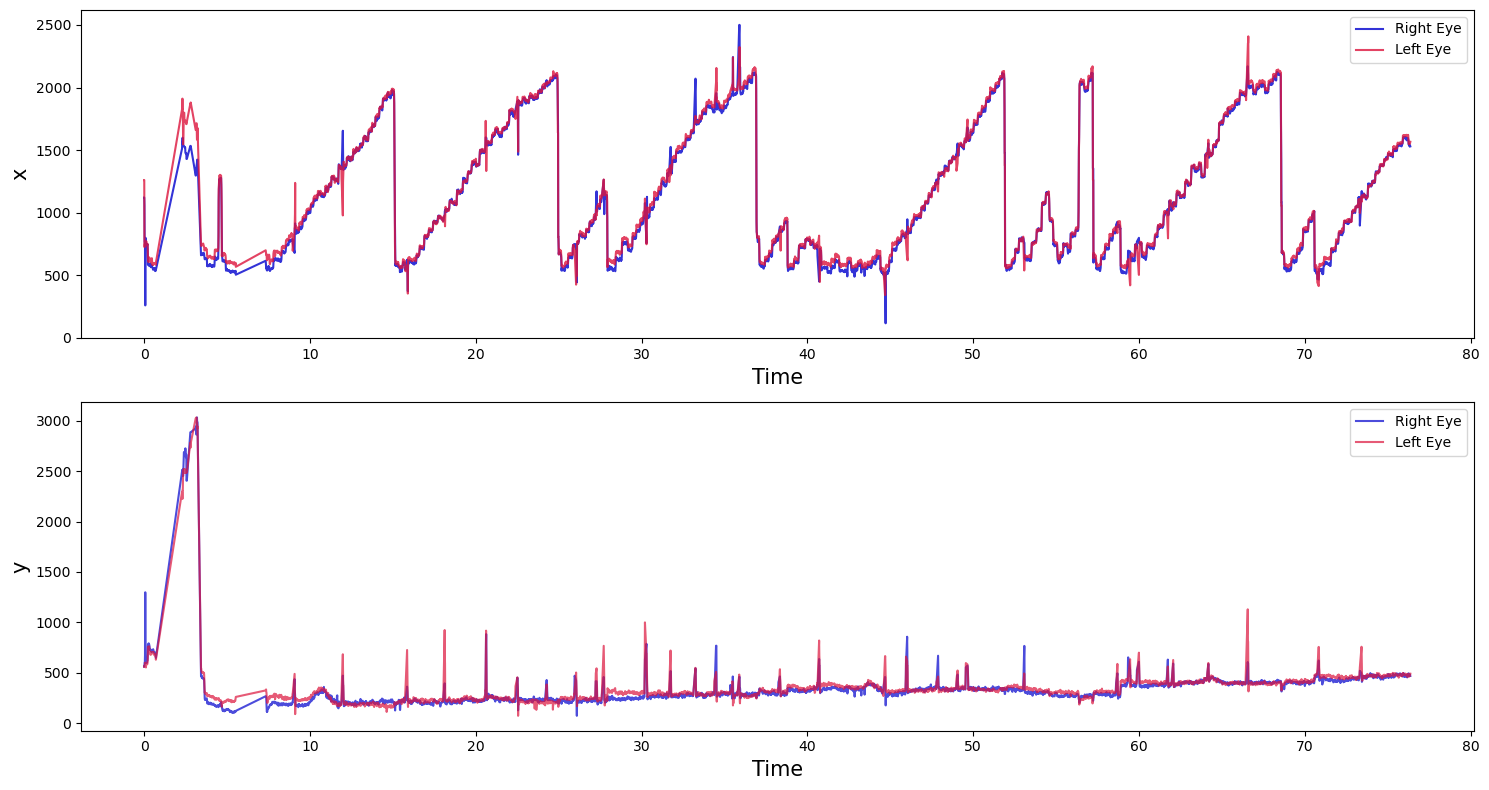

In [350]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [351]:
last = gaze["Label"][0]
textfiles = [un[0], un[3],un[6] ,un[9] ,un[12], un[15]]
changes = []
skimming_parts = []
index = 0

for i, j in zip(gaze["Label"], gaze["text_file"]):
    if i != "Immersive" and j in textfiles:
        
        changes.append(gaze.loc[index])
        
    elif len(changes) > 0:
        
        skimming_parts.append(changes)
        changes = []
   
    index = index + 1


In [352]:
for i in range(len(skimming_parts)):
    skimming_parts[i] = pd.DataFrame(skimming_parts[i])
    skimming_parts[i].reset_index(drop=True, inplace=True)
    skimming_parts[i]["device_time_stamp"] = skimming_parts[i]["device_time_stamp"] - skimming_parts[i]["device_time_stamp"][0]
     

In [353]:
imerserive_parts = [im_HC_AI ,
im_HC_OR ,
im_SK_AI ,
im_SK_OR ,
im_KB_AI ,
im_KB_OR 
]

In [354]:
part = 9
left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
t = skimming_parts[part]['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,1497.989044,1499.074097,187.878935,209.170268
1,0.010537,1490.862885,1491.879730,182.717443,213.227463
2,0.021808,1466.045837,1467.078400,185.556164,213.580141
3,0.033697,1453.997803,1457.911682,191.120546,210.297225
4,0.044272,1440.779572,1458.570099,190.176558,214.706948
5,0.054993,1442.766113,1460.791931,187.337794,216.929898
6,0.066790,1442.748108,1455.427856,186.374624,215.012419
7,0.077730,1439.690399,1453.574829,192.489331,216.216731
8,0.088118,1435.187683,1447.581177,192.681141,221.532912
9,0.100139,1368.320465,1378.769989,191.888945,225.945747


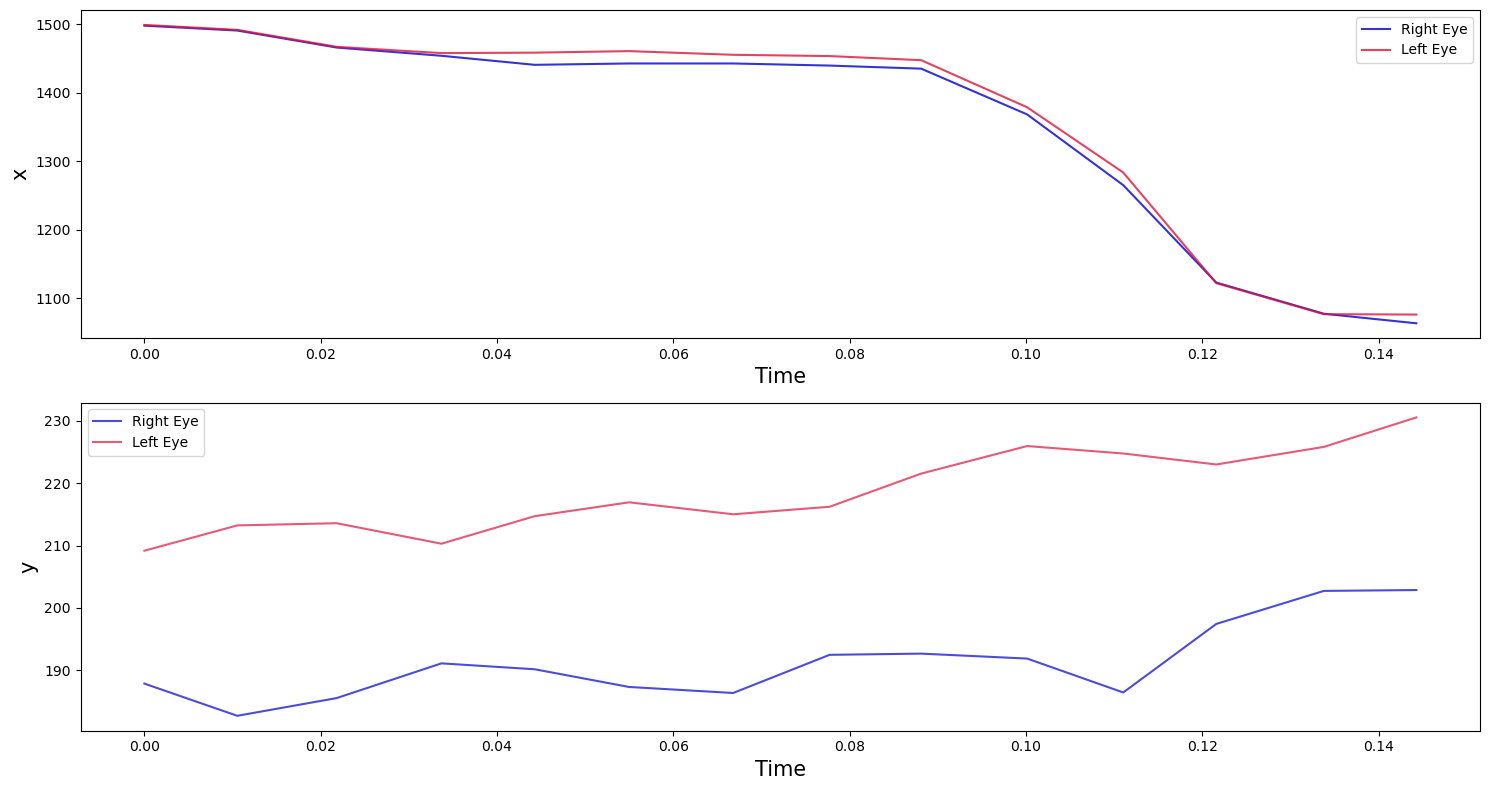

In [355]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()


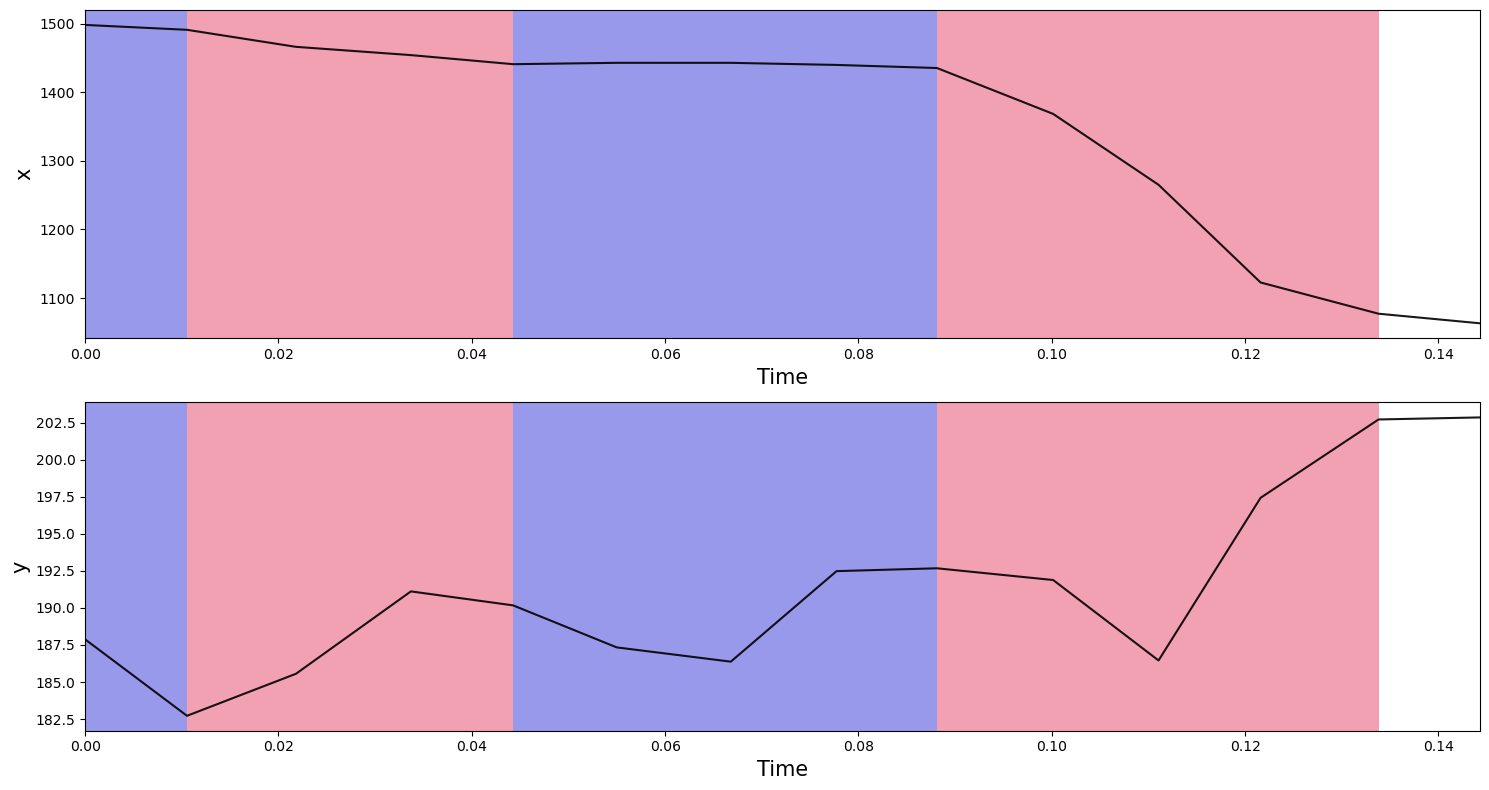

In [356]:
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
classifier.process()
classifier.plot()

In [357]:
skim_data = []
for i in range(len(skimming_parts)):
    part = i
    left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = skimming_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = skimming_parts[i].merge(fix, left_index=True, right_index=True)
    skim_data.append(round)


IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to 

In [358]:
skim_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-48.920509,46.103657,777.461792,11.210921,53.997639,779.436340,0.587497,...,3.100250,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Skimming,1
1,0.011641,1,1,-48.932083,46.168480,777.424561,11.198646,54.048229,779.405640,0.587522,...,3.103409,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Skimming,1
2,0.022512,1,1,-48.938251,46.213306,777.415466,11.196256,54.087234,779.395264,0.587534,...,3.114380,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Skimming,1
3,0.033632,1,1,-48.932117,46.262207,777.455811,11.200208,54.158844,779.437805,0.587518,...,3.112198,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Skimming,1
4,0.044979,1,1,-48.925751,46.272667,777.482178,11.210798,54.176250,779.460999,0.587503,...,3.119476,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Skimming,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,26.661226,1,1,-22.508305,53.113991,767.722351,37.754120,54.807590,767.221558,0.539784,...,2.894547,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Skimming,0
2021,26.672540,1,1,-22.446516,53.106380,767.744995,37.790600,54.802246,767.240295,0.539669,...,2.893051,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Skimming,0
2022,26.682939,1,1,-22.389614,53.110188,767.979370,37.866272,54.790882,767.508972,0.539551,...,2.898804,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Skimming,1
2023,26.694756,1,1,-22.397953,53.110928,768.372803,37.886013,54.800697,767.854248,0.539545,...,2.900787,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Skimming,1


In [359]:
im_data = []
for i in range(len(imerserive_parts)):
    part = i
    left_x = imerserive_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = imerserive_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = imerserive_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = imerserive_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = imerserive_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = imerserive_parts[i].merge(fix, left_index=True, right_index=True)
    im_data.append(round)

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [360]:
im_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-39.075691,47.457809,784.343567,20.979650,53.345211,785.401917,0.568899,...,2.719177,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Immersive,0
1,0.010978,1,1,-38.901928,47.424465,784.120117,21.103529,53.280933,785.198853,0.568605,...,2.712341,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Immersive,0
2,0.021968,1,1,-38.770611,47.388977,784.036133,21.242203,53.221767,785.102051,0.568375,...,2.713760,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Immersive,0
3,0.032825,1,1,-38.545307,47.334721,783.865906,21.457098,53.124031,784.920166,0.567982,...,2.715836,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Immersive,0
4,0.044315,1,1,-38.354813,47.295464,783.597351,21.627851,53.057663,784.631470,0.567661,...,2.706192,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Immersive,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10825,127.536576,1,1,-18.346722,46.511375,775.782654,41.611618,45.944641,774.809937,0.531758,...,3.007507,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Immersive,1
10826,127.547268,1,1,-18.391794,46.549019,775.900574,41.566410,46.008183,774.947571,0.531836,...,3.007523,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Immersive,1
10827,127.559331,1,1,-18.431707,46.570572,775.973755,41.529297,46.044044,775.012451,0.531905,...,3.003723,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Immersive,1
10828,127.569913,1,1,-18.480467,46.584167,776.032349,41.492592,46.082253,775.079712,0.531992,...,3.007355,True,AI_HC_P09_text.txt,9.0,16.0,Times New Roman,HC,False,Immersive,1


In [361]:
colunms_to_drop = ['Reading', 'passage_index', 'AI', 'Label']
for i in range(len(im_data)):
    im_data[i] = im_data[i].drop(columns = colunms_to_drop)
for i in range(len(skim_data)):
    skim_data[i] = skim_data[i].drop(columns = colunms_to_drop)

In [362]:
y_label = []
x_data = []
for i in range(len(im_data)):
    y_label.append("immersive")
    x_data.append(im_data[i])
for i in range(len(skim_data)):
    y_label.append("skimming")
    x_data.append(skim_data[i])

In [363]:
com_DF = pd.concat(x_data, ignore_index=True)

com_DF.to_csv(f'x_data_{testperson}.csv', index = False)
np.savetxt(f'y_label_{testperson}.csv', y_label, fmt='%s', delimiter=",")